In [1]:
import random
import math

class KMeans:
    def __init__(self, k=3, max_iterations=500):
        self.k = k
        self.max_iterations = max_iterations

    def eucldist(self, p0, p1):
        dist_squared = 0.0
        for i in range(0, len(p0)):
            dist_squared += (p0[i] - p1[i])**2
        
        return math.sqrt(dist_squared)
    
    def fit(self, datapoints, centroids):
        self.d = len(datapoints[0])
        self.clusters = [0] * len(datapoints)
        self.prev_clusters = [-1]*len(datapoints)
        self.itr = 0
        
        self.centroids = []
        for i in range(0,self.k):
            self.centroids.append(centroids[i])
            
        recalc = False
        while (self.clusters != self.prev_clusters) or (self.itr > self.max_iterations):
            self.prev_clusters = list(self.clusters)
            recalc = False
            self.itr += 1
            
            for p in range(0,len(datapoints)):
                min_dist = float("inf")
                for c in range(0, len(self.centroids)):
                    dist = self.eucldist(datapoints[p], self.centroids[c])
                    if dist < min_dist:
                        min_dist = dist
                        self.clusters[p] = c
    
            
            for k in range(0, len(self.centroids)):
                new_centroid = [0] * self.d
                members = 0
                for p in range(0,len(datapoints)):
                    if self.clusters[p] == self.k:
                        for j in range(0, self.d):
                            new_centroid[j] += datapoints[p][j]
                        members += 1
                
                for j in range(0, self.d):
                    if members != 0:
                        new_centroid[j] = new_centroid[j] / float(members)
                    else:
                        new_centroid = random.choice(datapoints)
                        recalc = True
                
                self.centroids[k] = new_centroid
            
            print(self.centroids)

In [2]:
# libraries for loading data and graph plotting
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import style
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

style.use('ggplot')

In [3]:
iris = datasets.load_iris()
# reading and shuffling input
X, y = shuffle(iris.data, iris.target, random_state=1126) # random_state is done so that results can be reporduced
X = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(y, columns=['Target'])

In [4]:
# K means clustering on iris dataset
km = KMeans(3, 500)
# a random sample chosen as centroid
centroids = X.sample(n=3, random_state=1608)
print(centroids)
datapoints = []
for val in X.values:
    datapoints.append(tuple(val))
centr = []
for c in centroids.values:
    centr.append(tuple(c))
km.fit(datapoints, centr)

    Sepal Length  Sepal Width  Petal Length  Petal Width
6            4.4          3.0           1.3          0.2
73           6.0          2.2           4.0          1.0
69           5.6          2.7           4.2          1.3
[(5.4, 3.9, 1.3, 0.4), (5.7, 2.8, 4.1, 1.3), (5.1, 3.5, 1.4, 0.2)]
[(6.2, 3.4, 5.4, 2.3), (4.9, 2.5, 4.5, 1.7), (5.8, 2.7, 4.1, 1.0)]
[(5.0, 3.0, 1.6, 0.2), (5.6, 2.5, 3.9, 1.1), (6.7, 3.1, 4.4, 1.4)]
[(6.1, 3.0, 4.6, 1.4), (5.4, 3.9, 1.7, 0.4), (6.0, 2.9, 4.5, 1.5)]
[(6.0, 2.2, 4.0, 1.0), (5.7, 2.6, 3.5, 1.0), (7.7, 3.0, 6.1, 2.3)]
[(6.0, 3.0, 4.8, 1.8), (5.0, 3.4, 1.6, 0.4), (4.9, 3.0, 1.4, 0.2)]
[(7.0, 3.2, 4.7, 1.4), (6.2, 2.9, 4.3, 1.3), (5.8, 2.8, 5.1, 2.4)]
[(5.6, 2.5, 3.9, 1.1), (5.0, 3.3, 1.4, 0.2), (4.8, 3.0, 1.4, 0.3)]
[(6.2, 2.8, 4.8, 1.8), (6.2, 2.9, 4.3, 1.3), (5.8, 4.0, 1.2, 0.2)]
[(5.0, 3.4, 1.6, 0.4), (4.8, 3.0, 1.4, 0.1), (5.6, 2.8, 4.9, 2.0)]
[(5.7, 2.6, 3.5, 1.0), (5.6, 3.0, 4.5, 1.5), (4.9, 3.0, 1.4, 0.2)]
[(7.7, 3.8, 6.7, 2.2), (5.4, 3.9, 1

[(6.8, 3.0, 5.5, 2.1), (5.6, 2.8, 4.9, 2.0), (6.3, 3.4, 5.6, 2.4)]
[(5.5, 2.6, 4.4, 1.2), (5.5, 3.5, 1.3, 0.2), (4.3, 3.0, 1.1, 0.1)]
[(5.4, 3.7, 1.5, 0.2), (7.7, 3.8, 6.7, 2.2), (4.6, 3.4, 1.4, 0.3)]
[(6.9, 3.1, 4.9, 1.5), (5.6, 2.8, 4.9, 2.0), (4.8, 3.0, 1.4, 0.1)]
[(4.9, 3.0, 1.4, 0.2), (6.0, 2.9, 4.5, 1.5), (5.4, 3.0, 4.5, 1.5)]
[(7.4, 2.8, 6.1, 1.9), (6.3, 2.7, 4.9, 1.8), (5.0, 3.5, 1.6, 0.6)]
[(5.4, 3.4, 1.5, 0.4), (4.9, 3.1, 1.5, 0.2), (6.4, 3.1, 5.5, 1.8)]
[(5.2, 3.5, 1.5, 0.2), (6.1, 3.0, 4.6, 1.4), (6.3, 3.4, 5.6, 2.4)]
[(4.8, 3.4, 1.9, 0.2), (5.1, 3.7, 1.5, 0.4), (6.8, 2.8, 4.8, 1.4)]
[(7.1, 3.0, 5.9, 2.1), (6.2, 3.4, 5.4, 2.3), (7.7, 3.8, 6.7, 2.2)]
[(5.5, 3.5, 1.3, 0.2), (6.3, 2.3, 4.4, 1.3), (5.0, 3.4, 1.5, 0.2)]
[(5.6, 3.0, 4.1, 1.3), (5.4, 3.4, 1.7, 0.2), (5.9, 3.2, 4.8, 1.8)]
[(5.0, 3.2, 1.2, 0.2), (5.8, 4.0, 1.2, 0.2), (5.6, 3.0, 4.5, 1.5)]
[(6.0, 3.4, 4.5, 1.6), (6.4, 2.9, 4.3, 1.3), (7.9, 3.8, 6.4, 2.0)]
[(6.0, 2.7, 5.1, 1.6), (6.0, 2.2, 4.0, 1.0), (6.8, 3.0, 5.5, 2

[(5.8, 2.7, 5.1, 1.9), (5.2, 2.7, 3.9, 1.4), (6.3, 3.4, 5.6, 2.4)]
[(6.8, 3.2, 5.9, 2.3), (5.4, 3.9, 1.3, 0.4), (6.6, 3.0, 4.4, 1.4)]
[(4.8, 3.1, 1.6, 0.2), (7.1, 3.0, 5.9, 2.1), (6.1, 3.0, 4.6, 1.4)]
[(7.7, 3.8, 6.7, 2.2), (6.7, 3.3, 5.7, 2.1), (5.1, 3.4, 1.5, 0.2)]
[(5.0, 3.5, 1.3, 0.3), (6.0, 2.2, 4.0, 1.0), (6.4, 3.2, 4.5, 1.5)]
[(4.9, 3.6, 1.4, 0.1), (6.1, 2.9, 4.7, 1.4), (7.6, 3.0, 6.6, 2.1)]
[(6.8, 3.2, 5.9, 2.3), (5.0, 2.3, 3.3, 1.0), (6.3, 3.4, 5.6, 2.4)]
[(5.5, 3.5, 1.3, 0.2), (6.1, 3.0, 4.6, 1.4), (4.9, 3.1, 1.5, 0.1)]
[(5.2, 3.5, 1.5, 0.2), (6.2, 2.9, 4.3, 1.3), (5.1, 3.8, 1.5, 0.3)]
[(6.1, 2.8, 4.0, 1.3), (6.1, 2.9, 4.7, 1.4), (5.9, 3.0, 4.2, 1.5)]
[(6.0, 3.4, 4.5, 1.6), (6.0, 2.2, 4.0, 1.0), (4.6, 3.2, 1.4, 0.2)]
[(5.1, 3.3, 1.7, 0.5), (5.2, 3.4, 1.4, 0.2), (5.2, 3.5, 1.5, 0.2)]
[(5.5, 2.4, 3.8, 1.1), (5.1, 3.4, 1.5, 0.2), (4.9, 3.6, 1.4, 0.1)]
[(5.7, 3.8, 1.7, 0.3), (5.1, 3.3, 1.7, 0.5), (6.3, 3.4, 5.6, 2.4)]
[(6.3, 2.8, 5.1, 1.5), (4.6, 3.4, 1.4, 0.3), (5.7, 3.0, 4.2, 1

[(6.5, 3.0, 5.8, 2.2), (6.5, 3.0, 5.8, 2.2), (6.1, 3.0, 4.6, 1.4)]
[(5.5, 2.5, 4.0, 1.3), (4.8, 3.1, 1.6, 0.2), (5.0, 3.5, 1.6, 0.6)]
[(5.1, 3.7, 1.5, 0.4), (4.9, 3.6, 1.4, 0.1), (5.7, 2.6, 3.5, 1.0)]
[(6.5, 3.0, 5.2, 2.0), (4.5, 2.3, 1.3, 0.3), (5.5, 2.3, 4.0, 1.3)]
[(5.6, 2.5, 3.9, 1.1), (6.0, 3.4, 4.5, 1.6), (5.2, 3.5, 1.5, 0.2)]
[(5.7, 2.8, 4.1, 1.3), (6.7, 3.3, 5.7, 2.1), (4.4, 3.0, 1.3, 0.2)]
[(6.1, 2.8, 4.7, 1.2), (5.4, 3.7, 1.5, 0.2), (4.4, 3.2, 1.3, 0.2)]
[(5.4, 3.9, 1.3, 0.4), (6.2, 2.9, 4.3, 1.3), (6.4, 2.7, 5.3, 1.9)]
[(5.7, 2.5, 5.0, 2.0), (6.6, 2.9, 4.6, 1.3), (6.7, 3.3, 5.7, 2.1)]
[(4.8, 3.1, 1.6, 0.2), (5.1, 3.5, 1.4, 0.3), (7.9, 3.8, 6.4, 2.0)]
[(7.6, 3.0, 6.6, 2.1), (6.3, 3.3, 4.7, 1.6), (5.6, 2.8, 4.9, 2.0)]
[(4.9, 3.1, 1.5, 0.2), (5.5, 2.6, 4.4, 1.2), (5.0, 3.3, 1.4, 0.2)]
[(7.7, 3.0, 6.1, 2.3), (5.0, 3.4, 1.6, 0.4), (5.8, 2.7, 5.1, 1.9)]
[(5.5, 2.6, 4.4, 1.2), (5.0, 2.0, 3.5, 1.0), (4.9, 3.1, 1.5, 0.1)]
[(6.3, 2.5, 5.0, 1.9), (4.5, 2.3, 1.3, 0.3), (5.6, 2.5, 3.9, 1

[(5.8, 2.7, 5.1, 1.9), (5.2, 3.5, 1.5, 0.2), (5.2, 3.4, 1.4, 0.2)]
[(6.2, 2.8, 4.8, 1.8), (5.0, 3.5, 1.6, 0.6), (7.4, 2.8, 6.1, 1.9)]
[(5.2, 2.7, 3.9, 1.4), (4.7, 3.2, 1.6, 0.2), (4.6, 3.2, 1.4, 0.2)]
[(5.6, 2.8, 4.9, 2.0), (5.7, 2.8, 4.5, 1.3), (6.1, 3.0, 4.6, 1.4)]
[(6.3, 2.8, 5.1, 1.5), (5.0, 3.6, 1.4, 0.2), (6.4, 2.9, 4.3, 1.3)]
[(5.7, 3.8, 1.7, 0.3), (6.3, 2.7, 4.9, 1.8), (5.8, 2.7, 3.9, 1.2)]
[(7.1, 3.0, 5.9, 2.1), (4.9, 2.5, 4.5, 1.7), (6.4, 3.2, 5.3, 2.3)]
[(5.1, 3.8, 1.6, 0.2), (4.4, 3.2, 1.3, 0.2), (6.1, 2.8, 4.7, 1.2)]
[(6.8, 3.2, 5.9, 2.3), (4.8, 3.1, 1.6, 0.2), (5.5, 2.5, 4.0, 1.3)]
[(5.6, 2.9, 3.6, 1.3), (5.7, 3.8, 1.7, 0.3), (6.5, 3.2, 5.1, 2.0)]
[(5.0, 3.5, 1.3, 0.3), (4.4, 3.0, 1.3, 0.2), (7.4, 2.8, 6.1, 1.9)]
[(6.3, 2.3, 4.4, 1.3), (6.1, 2.6, 5.6, 1.4), (6.8, 3.0, 5.5, 2.1)]
[(6.3, 2.5, 4.9, 1.5), (5.6, 2.5, 3.9, 1.1), (7.7, 2.6, 6.9, 2.3)]
[(7.6, 3.0, 6.6, 2.1), (4.4, 2.9, 1.4, 0.2), (6.0, 2.7, 5.1, 1.6)]
[(6.7, 3.3, 5.7, 2.5), (6.1, 2.8, 4.0, 1.3), (4.8, 3.0, 1.4, 0

[(5.0, 3.6, 1.4, 0.2), (6.8, 3.0, 5.5, 2.1), (6.5, 3.0, 5.5, 1.8)]
[(7.1, 3.0, 5.9, 2.1), (6.3, 2.7, 4.9, 1.8), (4.9, 3.1, 1.5, 0.1)]
[(4.9, 2.4, 3.3, 1.0), (7.7, 2.8, 6.7, 2.0), (7.2, 3.0, 5.8, 1.6)]
[(5.9, 3.0, 5.1, 1.8), (4.6, 3.2, 1.4, 0.2), (4.5, 2.3, 1.3, 0.3)]
[(6.4, 3.2, 4.5, 1.5), (5.8, 2.7, 3.9, 1.2), (4.9, 3.6, 1.4, 0.1)]
[(5.1, 3.5, 1.4, 0.2), (6.0, 2.9, 4.5, 1.5), (6.4, 2.9, 4.3, 1.3)]
[(6.5, 3.0, 5.8, 2.2), (6.7, 3.0, 5.0, 1.7), (5.2, 3.4, 1.4, 0.2)]
[(5.6, 2.5, 3.9, 1.1), (6.6, 3.0, 4.4, 1.4), (5.8, 4.0, 1.2, 0.2)]
[(5.1, 2.5, 3.0, 1.1), (6.9, 3.1, 4.9, 1.5), (5.8, 2.7, 5.1, 1.9)]
[(5.5, 2.5, 4.0, 1.3), (5.1, 3.5, 1.4, 0.3), (5.4, 3.9, 1.7, 0.4)]
[(6.0, 2.9, 4.5, 1.5), (4.6, 3.6, 1.0, 0.2), (5.7, 3.0, 4.2, 1.2)]
[(6.5, 3.0, 5.5, 1.8), (5.5, 3.5, 1.3, 0.2), (6.4, 2.7, 5.3, 1.9)]
[(5.8, 2.7, 5.1, 1.9), (5.6, 2.7, 4.2, 1.3), (4.9, 2.4, 3.3, 1.0)]
[(5.7, 2.8, 4.1, 1.3), (6.3, 3.3, 4.7, 1.6), (6.1, 3.0, 4.6, 1.4)]
[(6.0, 2.2, 4.0, 1.0), (6.7, 3.0, 5.2, 2.3), (6.0, 2.2, 4.0, 1

[(5.6, 3.0, 4.1, 1.3), (6.9, 3.2, 5.7, 2.3), (5.9, 3.0, 5.1, 1.8)]
[(6.3, 2.8, 5.1, 1.5), (6.0, 3.0, 4.8, 1.8), (6.3, 2.9, 5.6, 1.8)]
[(5.4, 3.4, 1.7, 0.2), (6.2, 2.9, 4.3, 1.3), (6.4, 3.2, 4.5, 1.5)]
[(5.9, 3.2, 4.8, 1.8), (6.3, 3.3, 4.7, 1.6), (5.9, 3.0, 5.1, 1.8)]
[(5.0, 3.4, 1.5, 0.2), (6.7, 3.1, 4.7, 1.5), (6.6, 2.9, 4.6, 1.3)]
[(6.7, 3.1, 5.6, 2.4), (5.8, 2.7, 3.9, 1.2), (6.7, 3.0, 5.0, 1.7)]
[(4.4, 3.2, 1.3, 0.2), (4.3, 3.0, 1.1, 0.1), (5.0, 3.4, 1.6, 0.4)]
[(4.9, 3.0, 1.4, 0.2), (5.0, 3.4, 1.6, 0.4), (5.2, 4.1, 1.5, 0.1)]
[(5.7, 3.8, 1.7, 0.3), (6.4, 2.7, 5.3, 1.9), (5.8, 2.7, 5.1, 1.9)]
[(5.6, 2.7, 4.2, 1.3), (4.8, 3.4, 1.6, 0.2), (6.7, 3.0, 5.0, 1.7)]
[(5.7, 3.8, 1.7, 0.3), (5.0, 3.6, 1.4, 0.2), (5.0, 2.0, 3.5, 1.0)]
[(4.5, 2.3, 1.3, 0.3), (5.0, 3.0, 1.6, 0.2), (5.0, 2.0, 3.5, 1.0)]
[(4.6, 3.6, 1.0, 0.2), (6.7, 2.5, 5.8, 1.8), (5.6, 2.7, 4.2, 1.3)]
[(6.1, 2.8, 4.0, 1.3), (5.5, 2.4, 3.8, 1.1), (6.8, 3.0, 5.5, 2.1)]
[(4.6, 3.2, 1.4, 0.2), (5.6, 2.7, 4.2, 1.3), (4.4, 3.0, 1.3, 0

[(5.6, 2.8, 4.9, 2.0), (5.6, 2.7, 4.2, 1.3), (5.8, 2.7, 5.1, 1.9)]
[(4.8, 3.0, 1.4, 0.3), (6.2, 3.4, 5.4, 2.3), (4.7, 3.2, 1.6, 0.2)]
[(5.2, 4.1, 1.5, 0.1), (5.8, 2.6, 4.0, 1.2), (6.6, 2.9, 4.6, 1.3)]
[(5.5, 2.3, 4.0, 1.3), (4.8, 3.0, 1.4, 0.3), (6.2, 2.8, 4.8, 1.8)]
[(4.4, 3.2, 1.3, 0.2), (6.7, 2.5, 5.8, 1.8), (7.7, 2.8, 6.7, 2.0)]
[(4.7, 3.2, 1.6, 0.2), (5.1, 3.8, 1.5, 0.3), (6.7, 3.0, 5.2, 2.3)]
[(6.3, 3.3, 4.7, 1.6), (5.6, 2.8, 4.9, 2.0), (5.8, 2.6, 4.0, 1.2)]
[(6.4, 2.8, 5.6, 2.2), (6.2, 2.9, 4.3, 1.3), (5.5, 2.4, 3.7, 1.0)]
[(6.0, 2.2, 5.0, 1.5), (7.0, 3.2, 4.7, 1.4), (5.8, 2.7, 5.1, 1.9)]
[(6.2, 2.2, 4.5, 1.5), (5.1, 3.8, 1.6, 0.2), (5.3, 3.7, 1.5, 0.2)]
[(5.4, 3.4, 1.7, 0.2), (6.1, 2.8, 4.7, 1.2), (6.7, 3.1, 5.6, 2.4)]
[(5.7, 2.5, 5.0, 2.0), (6.2, 2.2, 4.5, 1.5), (6.7, 3.3, 5.7, 2.5)]
[(5.0, 3.4, 1.5, 0.2), (6.7, 3.3, 5.7, 2.5), (6.7, 3.0, 5.0, 1.7)]
[(5.0, 2.0, 3.5, 1.0), (6.9, 3.1, 4.9, 1.5), (5.2, 2.7, 3.9, 1.4)]
[(5.8, 2.7, 5.1, 1.9), (4.6, 3.6, 1.0, 0.2), (6.8, 3.0, 5.5, 2

[(4.8, 3.4, 1.6, 0.2), (6.9, 3.1, 4.9, 1.5), (5.4, 3.4, 1.7, 0.2)]
[(6.4, 3.2, 5.3, 2.3), (7.2, 3.6, 6.1, 2.5), (5.0, 3.2, 1.2, 0.2)]
[(5.5, 3.5, 1.3, 0.2), (5.5, 2.6, 4.4, 1.2), (6.0, 2.9, 4.5, 1.5)]
[(5.1, 3.4, 1.5, 0.2), (5.7, 2.8, 4.1, 1.3), (5.7, 2.6, 3.5, 1.0)]
[(6.7, 3.0, 5.2, 2.3), (6.1, 2.9, 4.7, 1.4), (5.1, 3.8, 1.9, 0.4)]
[(6.5, 2.8, 4.6, 1.5), (7.7, 3.8, 6.7, 2.2), (5.8, 4.0, 1.2, 0.2)]
[(5.7, 2.6, 3.5, 1.0), (6.1, 3.0, 4.9, 1.8), (6.4, 2.9, 4.3, 1.3)]
[(5.0, 3.2, 1.2, 0.2), (6.9, 3.1, 4.9, 1.5), (6.7, 3.1, 5.6, 2.4)]
[(6.3, 2.8, 5.1, 1.5), (6.2, 2.9, 4.3, 1.3), (5.6, 3.0, 4.1, 1.3)]
[(7.7, 3.8, 6.7, 2.2), (7.2, 3.0, 5.8, 1.6), (6.2, 2.2, 4.5, 1.5)]
[(6.6, 2.9, 4.6, 1.3), (5.9, 3.0, 4.2, 1.5), (4.6, 3.4, 1.4, 0.3)]
[(5.6, 3.0, 4.1, 1.3), (4.4, 3.0, 1.3, 0.2), (5.7, 2.6, 3.5, 1.0)]
[(5.1, 3.7, 1.5, 0.4), (5.7, 2.8, 4.1, 1.3), (6.3, 2.5, 5.0, 1.9)]
[(5.6, 3.0, 4.5, 1.5), (5.7, 2.6, 3.5, 1.0), (5.8, 2.7, 3.9, 1.2)]
[(6.3, 2.8, 5.1, 1.5), (5.7, 2.8, 4.5, 1.3), (5.5, 3.5, 1.3, 0

[(5.2, 4.1, 1.5, 0.1), (5.6, 3.0, 4.1, 1.3), (6.6, 3.0, 4.4, 1.4)]
[(6.5, 3.0, 5.8, 2.2), (6.5, 3.0, 5.5, 1.8), (5.9, 3.0, 5.1, 1.8)]
[(5.1, 3.7, 1.5, 0.4), (6.8, 3.0, 5.5, 2.1), (6.5, 3.0, 5.2, 2.0)]
[(6.1, 2.8, 4.7, 1.2), (5.2, 3.5, 1.5, 0.2), (5.0, 3.5, 1.6, 0.6)]
[(6.8, 2.8, 4.8, 1.4), (6.1, 3.0, 4.6, 1.4), (5.8, 2.7, 5.1, 1.9)]
[(5.1, 3.8, 1.5, 0.3), (5.4, 3.9, 1.3, 0.4), (4.9, 3.1, 1.5, 0.2)]
[(5.6, 2.9, 3.6, 1.3), (7.7, 2.8, 6.7, 2.0), (6.7, 3.1, 5.6, 2.4)]
[(7.2, 3.0, 5.8, 1.6), (5.7, 2.8, 4.1, 1.3), (5.6, 2.7, 4.2, 1.3)]
[(6.5, 2.8, 4.6, 1.5), (4.3, 3.0, 1.1, 0.1), (5.6, 2.5, 3.9, 1.1)]
[(5.6, 2.8, 4.9, 2.0), (6.7, 3.3, 5.7, 2.5), (5.0, 3.2, 1.2, 0.2)]
[(5.5, 2.4, 3.8, 1.1), (4.7, 3.2, 1.3, 0.2), (5.1, 2.5, 3.0, 1.1)]
[(6.7, 3.1, 4.4, 1.4), (4.9, 3.1, 1.5, 0.2), (6.8, 3.2, 5.9, 2.3)]
[(5.0, 2.3, 3.3, 1.0), (6.8, 2.8, 4.8, 1.4), (6.4, 2.7, 5.3, 1.9)]
[(5.8, 2.7, 4.1, 1.0), (5.7, 3.0, 4.2, 1.2), (7.2, 3.0, 5.8, 1.6)]
[(5.1, 3.5, 1.4, 0.3), (7.7, 3.0, 6.1, 2.3), (5.1, 3.5, 1.4, 0

[(6.1, 2.8, 4.0, 1.3), (6.7, 3.1, 4.4, 1.4), (6.0, 2.7, 5.1, 1.6)]
[(5.1, 3.8, 1.5, 0.3), (5.5, 3.5, 1.3, 0.2), (4.6, 3.4, 1.4, 0.3)]
[(5.5, 2.4, 3.8, 1.1), (7.7, 2.6, 6.9, 2.3), (5.4, 3.9, 1.7, 0.4)]
[(7.4, 2.8, 6.1, 1.9), (6.0, 2.2, 4.0, 1.0), (4.9, 3.0, 1.4, 0.2)]
[(6.4, 2.9, 4.3, 1.3), (5.5, 2.5, 4.0, 1.3), (5.9, 3.0, 4.2, 1.5)]
[(5.1, 2.5, 3.0, 1.1), (6.7, 3.3, 5.7, 2.1), (5.7, 2.6, 3.5, 1.0)]
[(7.2, 3.0, 5.8, 1.6), (6.1, 3.0, 4.9, 1.8), (6.9, 3.1, 5.4, 2.1)]
[(5.5, 2.5, 4.0, 1.3), (5.5, 2.6, 4.4, 1.2), (6.4, 2.8, 5.6, 2.2)]
[(6.3, 2.9, 5.6, 1.8), (4.9, 3.1, 1.5, 0.2), (5.4, 3.9, 1.7, 0.4)]
[(6.7, 3.3, 5.7, 2.1), (5.8, 2.7, 3.9, 1.2), (5.1, 3.7, 1.5, 0.4)]
[(7.4, 2.8, 6.1, 1.9), (6.4, 2.9, 4.3, 1.3), (7.3, 2.9, 6.3, 1.8)]
[(5.0, 3.5, 1.3, 0.3), (4.6, 3.2, 1.4, 0.2), (5.5, 2.3, 4.0, 1.3)]
[(4.9, 3.6, 1.4, 0.1), (5.8, 2.7, 3.9, 1.2), (6.3, 3.4, 5.6, 2.4)]
[(5.5, 4.2, 1.4, 0.2), (6.6, 3.0, 4.4, 1.4), (5.7, 2.8, 4.1, 1.3)]
[(7.2, 3.2, 6.0, 1.8), (7.7, 3.0, 6.1, 2.3), (5.6, 2.8, 4.9, 2

[(5.8, 2.6, 4.0, 1.2), (6.3, 2.9, 5.6, 1.8), (4.8, 3.0, 1.4, 0.1)]
[(5.8, 2.7, 4.1, 1.0), (6.3, 2.5, 4.9, 1.5), (6.3, 2.7, 4.9, 1.8)]
[(5.0, 3.5, 1.3, 0.3), (5.6, 2.5, 3.9, 1.1), (5.7, 2.5, 5.0, 2.0)]
[(7.0, 3.2, 4.7, 1.4), (5.2, 2.7, 3.9, 1.4), (5.8, 4.0, 1.2, 0.2)]
[(5.8, 2.7, 3.9, 1.2), (6.3, 2.9, 5.6, 1.8), (4.9, 2.4, 3.3, 1.0)]
[(6.1, 3.0, 4.9, 1.8), (5.5, 4.2, 1.4, 0.2), (5.5, 2.5, 4.0, 1.3)]
[(7.1, 3.0, 5.9, 2.1), (5.9, 3.0, 4.2, 1.5), (6.3, 2.5, 5.0, 1.9)]
[(4.9, 3.0, 1.4, 0.2), (4.9, 2.5, 4.5, 1.7), (7.7, 3.0, 6.1, 2.3)]
[(5.7, 2.8, 4.5, 1.3), (6.8, 3.2, 5.9, 2.3), (5.2, 4.1, 1.5, 0.1)]
[(5.0, 3.5, 1.6, 0.6), (5.6, 2.7, 4.2, 1.3), (5.5, 3.5, 1.3, 0.2)]
[(4.4, 2.9, 1.4, 0.2), (6.3, 2.5, 5.0, 1.9), (6.7, 3.0, 5.0, 1.7)]
[(5.6, 3.0, 4.1, 1.3), (6.3, 3.3, 6.0, 2.5), (4.3, 3.0, 1.1, 0.1)]
[(4.9, 2.5, 4.5, 1.7), (6.4, 2.7, 5.3, 1.9), (5.7, 2.8, 4.5, 1.3)]
[(4.9, 2.4, 3.3, 1.0), (6.7, 2.5, 5.8, 1.8), (7.0, 3.2, 4.7, 1.4)]
[(6.2, 3.4, 5.4, 2.3), (6.7, 3.0, 5.0, 1.7), (6.5, 3.0, 5.5, 1

[(6.7, 2.5, 5.8, 1.8), (5.7, 4.4, 1.5, 0.4), (5.8, 2.7, 5.1, 1.9)]
[(4.6, 3.2, 1.4, 0.2), (6.8, 3.2, 5.9, 2.3), (6.6, 3.0, 4.4, 1.4)]
[(5.1, 2.5, 3.0, 1.1), (6.3, 2.5, 5.0, 1.9), (5.8, 2.6, 4.0, 1.2)]
[(7.2, 3.0, 5.8, 1.6), (6.0, 2.2, 5.0, 1.5), (7.2, 3.6, 6.1, 2.5)]
[(5.2, 3.5, 1.5, 0.2), (6.7, 3.0, 5.2, 2.3), (5.0, 3.4, 1.6, 0.4)]
[(6.3, 2.5, 4.9, 1.5), (4.9, 2.4, 3.3, 1.0), (5.4, 3.4, 1.5, 0.4)]
[(5.3, 3.7, 1.5, 0.2), (5.1, 3.8, 1.6, 0.2), (4.7, 3.2, 1.6, 0.2)]
[(6.9, 3.1, 5.4, 2.1), (4.6, 3.4, 1.4, 0.3), (5.7, 3.0, 4.2, 1.2)]
[(6.7, 3.3, 5.7, 2.1), (5.8, 2.7, 5.1, 1.9), (6.3, 2.5, 5.0, 1.9)]
[(6.3, 3.4, 5.6, 2.4), (5.6, 2.9, 3.6, 1.3), (6.1, 3.0, 4.6, 1.4)]
[(5.1, 3.5, 1.4, 0.3), (5.9, 3.0, 5.1, 1.8), (5.0, 3.2, 1.2, 0.2)]
[(5.5, 2.6, 4.4, 1.2), (6.7, 2.5, 5.8, 1.8), (5.8, 2.7, 5.1, 1.9)]
[(6.4, 2.7, 5.3, 1.9), (6.4, 3.2, 4.5, 1.5), (5.6, 2.7, 4.2, 1.3)]
[(6.4, 3.2, 4.5, 1.5), (7.0, 3.2, 4.7, 1.4), (6.8, 2.8, 4.8, 1.4)]
[(6.5, 3.0, 5.5, 1.8), (6.1, 2.9, 4.7, 1.4), (5.7, 2.8, 4.5, 1

[(5.1, 3.8, 1.6, 0.2), (4.8, 3.1, 1.6, 0.2), (5.5, 2.6, 4.4, 1.2)]
[(4.9, 3.1, 1.5, 0.2), (6.9, 3.1, 5.1, 2.3), (5.4, 3.7, 1.5, 0.2)]
[(6.4, 3.2, 4.5, 1.5), (5.7, 2.9, 4.2, 1.3), (6.2, 2.9, 4.3, 1.3)]
[(6.0, 3.0, 4.8, 1.8), (5.2, 4.1, 1.5, 0.1), (5.1, 3.7, 1.5, 0.4)]
[(7.2, 3.2, 6.0, 1.8), (6.9, 3.1, 4.9, 1.5), (6.3, 2.3, 4.4, 1.3)]
[(4.6, 3.4, 1.4, 0.3), (5.2, 2.7, 3.9, 1.4), (5.5, 3.5, 1.3, 0.2)]
[(5.8, 2.7, 5.1, 1.9), (5.0, 3.4, 1.5, 0.2), (4.8, 3.1, 1.6, 0.2)]
[(6.1, 2.6, 5.6, 1.4), (6.4, 2.8, 5.6, 2.1), (5.0, 3.2, 1.2, 0.2)]
[(5.1, 3.3, 1.7, 0.5), (7.3, 2.9, 6.3, 1.8), (5.4, 3.0, 4.5, 1.5)]
[(6.5, 3.0, 5.5, 1.8), (5.9, 3.2, 4.8, 1.8), (5.0, 3.3, 1.4, 0.2)]
[(7.0, 3.2, 4.7, 1.4), (7.2, 3.6, 6.1, 2.5), (5.1, 2.5, 3.0, 1.1)]
[(5.5, 2.5, 4.0, 1.3), (5.2, 2.7, 3.9, 1.4), (5.1, 3.8, 1.9, 0.4)]
[(5.3, 3.7, 1.5, 0.2), (6.6, 3.0, 4.4, 1.4), (5.0, 3.0, 1.6, 0.2)]
[(6.5, 3.0, 5.2, 2.0), (5.7, 2.8, 4.1, 1.3), (5.5, 2.3, 4.0, 1.3)]
[(7.1, 3.0, 5.9, 2.1), (6.1, 3.0, 4.6, 1.4), (4.6, 3.6, 1.0, 0

[(6.2, 2.9, 4.3, 1.3), (6.3, 3.3, 4.7, 1.6), (5.2, 3.5, 1.5, 0.2)]
[(7.2, 3.0, 5.8, 1.6), (6.3, 2.5, 4.9, 1.5), (5.1, 3.8, 1.5, 0.3)]
[(5.8, 2.6, 4.0, 1.2), (5.2, 3.5, 1.5, 0.2), (5.4, 3.7, 1.5, 0.2)]
[(6.3, 2.7, 4.9, 1.8), (6.0, 2.7, 5.1, 1.6), (5.1, 3.8, 1.5, 0.3)]
[(5.7, 4.4, 1.5, 0.4), (6.7, 3.3, 5.7, 2.1), (5.8, 4.0, 1.2, 0.2)]
[(7.2, 3.0, 5.8, 1.6), (5.4, 3.4, 1.7, 0.2), (7.6, 3.0, 6.6, 2.1)]
[(7.6, 3.0, 6.6, 2.1), (6.9, 3.1, 4.9, 1.5), (5.6, 2.7, 4.2, 1.3)]
[(4.9, 3.6, 1.4, 0.1), (5.1, 3.8, 1.9, 0.4), (5.4, 3.9, 1.7, 0.4)]
[(5.2, 4.1, 1.5, 0.1), (6.1, 2.8, 4.7, 1.2), (5.2, 3.5, 1.5, 0.2)]
[(7.3, 2.9, 6.3, 1.8), (6.1, 2.8, 4.0, 1.3), (4.6, 3.2, 1.4, 0.2)]
[(6.0, 2.2, 4.0, 1.0), (6.3, 3.4, 5.6, 2.4), (4.6, 3.4, 1.4, 0.3)]
[(5.7, 2.9, 4.2, 1.3), (6.3, 3.4, 5.6, 2.4), (5.4, 3.9, 1.7, 0.4)]
[(6.0, 2.9, 4.5, 1.5), (7.4, 2.8, 6.1, 1.9), (4.9, 2.5, 4.5, 1.7)]
[(5.7, 2.8, 4.5, 1.3), (7.0, 3.2, 4.7, 1.4), (5.1, 3.5, 1.4, 0.2)]
[(5.4, 3.7, 1.5, 0.2), (5.6, 2.9, 3.6, 1.3), (4.4, 3.2, 1.3, 0

[(4.9, 3.1, 1.5, 0.2), (5.4, 3.0, 4.5, 1.5), (6.0, 2.9, 4.5, 1.5)]
[(5.1, 3.8, 1.9, 0.4), (5.7, 4.4, 1.5, 0.4), (5.6, 3.0, 4.5, 1.5)]
[(5.6, 2.7, 4.2, 1.3), (5.8, 2.8, 5.1, 2.4), (4.7, 3.2, 1.6, 0.2)]
[(5.0, 2.3, 3.3, 1.0), (6.4, 2.7, 5.3, 1.9), (5.7, 3.0, 4.2, 1.2)]
[(5.5, 2.5, 4.0, 1.3), (7.2, 3.6, 6.1, 2.5), (6.9, 3.2, 5.7, 2.3)]
[(5.8, 2.6, 4.0, 1.2), (4.8, 3.0, 1.4, 0.1), (6.4, 3.1, 5.5, 1.8)]
[(6.4, 3.2, 5.3, 2.3), (5.1, 3.8, 1.6, 0.2), (5.9, 3.2, 4.8, 1.8)]
[(5.7, 3.0, 4.2, 1.2), (6.7, 3.1, 5.6, 2.4), (5.4, 3.4, 1.7, 0.2)]
[(5.1, 3.7, 1.5, 0.4), (5.0, 2.0, 3.5, 1.0), (5.6, 3.0, 4.5, 1.5)]
[(6.1, 3.0, 4.6, 1.4), (5.0, 3.4, 1.5, 0.2), (5.0, 3.4, 1.6, 0.4)]
[(4.8, 3.1, 1.6, 0.2), (6.0, 2.9, 4.5, 1.5), (5.1, 3.8, 1.6, 0.2)]
[(6.0, 3.4, 4.5, 1.6), (6.5, 2.8, 4.6, 1.5), (6.0, 2.7, 5.1, 1.6)]
[(7.4, 2.8, 6.1, 1.9), (5.2, 4.1, 1.5, 0.1), (6.2, 2.9, 4.3, 1.3)]
[(5.1, 3.8, 1.9, 0.4), (4.8, 3.0, 1.4, 0.1), (5.8, 2.7, 5.1, 1.9)]
[(5.5, 2.5, 4.0, 1.3), (7.2, 3.0, 5.8, 1.6), (5.8, 2.8, 5.1, 2

[(5.6, 2.5, 3.9, 1.1), (6.4, 2.8, 5.6, 2.2), (5.0, 3.6, 1.4, 0.2)]
[(6.4, 2.8, 5.6, 2.1), (5.8, 2.8, 5.1, 2.4), (5.5, 2.3, 4.0, 1.3)]
[(4.8, 3.4, 1.9, 0.2), (5.5, 2.4, 3.7, 1.0), (6.6, 2.9, 4.6, 1.3)]
[(6.5, 3.2, 5.1, 2.0), (5.1, 3.4, 1.5, 0.2), (6.2, 2.9, 4.3, 1.3)]
[(4.8, 3.4, 1.9, 0.2), (5.1, 3.8, 1.9, 0.4), (5.7, 2.5, 5.0, 2.0)]
[(5.9, 3.0, 4.2, 1.5), (7.2, 3.6, 6.1, 2.5), (5.1, 3.5, 1.4, 0.3)]
[(5.0, 2.3, 3.3, 1.0), (5.6, 2.5, 3.9, 1.1), (4.8, 3.0, 1.4, 0.3)]
[(6.2, 2.2, 4.5, 1.5), (5.4, 3.0, 4.5, 1.5), (5.7, 2.9, 4.2, 1.3)]
[(5.0, 3.6, 1.4, 0.2), (6.1, 3.0, 4.6, 1.4), (5.1, 3.4, 1.5, 0.2)]
[(5.7, 2.9, 4.2, 1.3), (4.8, 3.4, 1.9, 0.2), (4.9, 2.5, 4.5, 1.7)]
[(5.1, 2.5, 3.0, 1.1), (5.0, 3.5, 1.6, 0.6), (6.2, 2.2, 4.5, 1.5)]
[(7.1, 3.0, 5.9, 2.1), (5.6, 3.0, 4.5, 1.5), (4.8, 3.0, 1.4, 0.1)]
[(4.6, 3.2, 1.4, 0.2), (6.3, 2.5, 4.9, 1.5), (5.2, 3.4, 1.4, 0.2)]
[(6.5, 3.0, 5.8, 2.2), (6.8, 2.8, 4.8, 1.4), (5.6, 3.0, 4.5, 1.5)]
[(7.1, 3.0, 5.9, 2.1), (6.4, 2.8, 5.6, 2.1), (6.3, 2.7, 4.9, 1

[(5.7, 3.8, 1.7, 0.3), (6.5, 3.0, 5.8, 2.2), (6.2, 2.9, 4.3, 1.3)]
[(5.5, 2.4, 3.8, 1.1), (6.9, 3.1, 5.1, 2.3), (6.7, 3.3, 5.7, 2.1)]
[(4.9, 3.1, 1.5, 0.1), (5.4, 3.9, 1.7, 0.4), (5.8, 2.7, 5.1, 1.9)]
[(7.7, 3.0, 6.1, 2.3), (5.8, 2.7, 3.9, 1.2), (5.2, 3.4, 1.4, 0.2)]
[(4.8, 3.4, 1.6, 0.2), (6.6, 2.9, 4.6, 1.3), (7.7, 2.8, 6.7, 2.0)]
[(6.7, 3.3, 5.7, 2.5), (5.9, 3.0, 4.2, 1.5), (5.1, 3.8, 1.5, 0.3)]
[(5.5, 3.5, 1.3, 0.2), (4.9, 3.1, 1.5, 0.1), (5.6, 3.0, 4.1, 1.3)]
[(5.4, 3.9, 1.7, 0.4), (4.9, 2.5, 4.5, 1.7), (5.6, 2.5, 3.9, 1.1)]
[(6.5, 3.0, 5.5, 1.8), (4.4, 3.0, 1.3, 0.2), (6.5, 3.0, 5.8, 2.2)]
[(5.5, 2.3, 4.0, 1.3), (5.5, 2.3, 4.0, 1.3), (6.7, 3.1, 4.4, 1.4)]
[(4.7, 3.2, 1.3, 0.2), (6.4, 3.2, 5.3, 2.3), (5.1, 3.8, 1.6, 0.2)]
[(5.8, 2.6, 4.0, 1.2), (5.0, 3.4, 1.6, 0.4), (6.3, 3.3, 4.7, 1.6)]
[(6.1, 3.0, 4.9, 1.8), (5.1, 3.4, 1.5, 0.2), (6.5, 2.8, 4.6, 1.5)]
[(5.8, 2.6, 4.0, 1.2), (6.1, 3.0, 4.9, 1.8), (6.7, 2.5, 5.8, 1.8)]
[(6.3, 3.3, 6.0, 2.5), (5.6, 2.8, 4.9, 2.0), (5.9, 3.0, 4.2, 1

[(6.7, 3.3, 5.7, 2.1), (6.2, 2.8, 4.8, 1.8), (6.9, 3.1, 4.9, 1.5)]
[(6.3, 3.3, 4.7, 1.6), (5.1, 3.8, 1.6, 0.2), (5.5, 2.5, 4.0, 1.3)]
[(6.1, 2.6, 5.6, 1.4), (7.2, 3.6, 6.1, 2.5), (6.4, 3.1, 5.5, 1.8)]
[(5.5, 2.5, 4.0, 1.3), (6.0, 2.9, 4.5, 1.5), (4.6, 3.1, 1.5, 0.2)]
[(5.4, 3.9, 1.7, 0.4), (6.9, 3.1, 5.4, 2.1), (5.1, 2.5, 3.0, 1.1)]
[(6.2, 2.2, 4.5, 1.5), (7.4, 2.8, 6.1, 1.9), (6.4, 3.2, 4.5, 1.5)]
[(5.8, 2.6, 4.0, 1.2), (5.6, 2.5, 3.9, 1.1), (5.0, 3.4, 1.5, 0.2)]
[(5.2, 3.5, 1.5, 0.2), (6.1, 2.8, 4.0, 1.3), (7.7, 2.8, 6.7, 2.0)]
[(6.2, 2.8, 4.8, 1.8), (6.2, 3.4, 5.4, 2.3), (7.4, 2.8, 6.1, 1.9)]
[(7.2, 3.2, 6.0, 1.8), (6.0, 2.9, 4.5, 1.5), (4.6, 3.1, 1.5, 0.2)]
[(6.3, 2.8, 5.1, 1.5), (5.5, 2.4, 3.7, 1.0), (4.8, 3.1, 1.6, 0.2)]
[(6.3, 3.3, 6.0, 2.5), (6.0, 2.9, 4.5, 1.5), (5.0, 3.3, 1.4, 0.2)]
[(6.8, 2.8, 4.8, 1.4), (7.3, 2.9, 6.3, 1.8), (7.2, 3.2, 6.0, 1.8)]
[(6.0, 2.2, 5.0, 1.5), (6.3, 3.4, 5.6, 2.4), (7.0, 3.2, 4.7, 1.4)]
[(5.0, 3.5, 1.3, 0.3), (6.7, 3.1, 5.6, 2.4), (5.0, 3.5, 1.3, 0

[(6.2, 2.9, 4.3, 1.3), (4.8, 3.0, 1.4, 0.3), (4.8, 3.4, 1.9, 0.2)]
[(5.0, 3.5, 1.3, 0.3), (6.1, 2.9, 4.7, 1.4), (6.2, 2.9, 4.3, 1.3)]
[(6.7, 3.1, 4.4, 1.4), (6.1, 3.0, 4.9, 1.8), (5.5, 2.6, 4.4, 1.2)]
[(7.4, 2.8, 6.1, 1.9), (5.4, 3.9, 1.7, 0.4), (6.0, 2.7, 5.1, 1.6)]
[(5.9, 3.0, 5.1, 1.8), (6.7, 3.1, 4.4, 1.4), (5.3, 3.7, 1.5, 0.2)]
[(4.8, 3.0, 1.4, 0.1), (6.2, 2.8, 4.8, 1.8), (5.5, 2.4, 3.8, 1.1)]
[(5.5, 2.4, 3.8, 1.1), (5.1, 3.7, 1.5, 0.4), (7.2, 3.6, 6.1, 2.5)]
[(6.0, 2.2, 5.0, 1.5), (5.6, 2.8, 4.9, 2.0), (5.0, 2.0, 3.5, 1.0)]
[(6.3, 2.5, 5.0, 1.9), (5.7, 4.4, 1.5, 0.4), (6.7, 3.0, 5.0, 1.7)]
[(6.8, 2.8, 4.8, 1.4), (5.6, 2.7, 4.2, 1.3), (7.7, 3.8, 6.7, 2.2)]
[(4.8, 3.0, 1.4, 0.3), (4.9, 2.4, 3.3, 1.0), (4.3, 3.0, 1.1, 0.1)]
[(7.7, 2.6, 6.9, 2.3), (4.9, 3.1, 1.5, 0.1), (6.5, 3.2, 5.1, 2.0)]
[(5.1, 3.8, 1.6, 0.2), (5.4, 3.7, 1.5, 0.2), (7.3, 2.9, 6.3, 1.8)]
[(5.1, 3.4, 1.5, 0.2), (5.1, 3.8, 1.5, 0.3), (5.8, 2.8, 5.1, 2.4)]
[(5.4, 3.4, 1.7, 0.2), (5.1, 3.8, 1.5, 0.3), (7.6, 3.0, 6.6, 2

[(5.2, 3.4, 1.4, 0.2), (4.9, 2.5, 4.5, 1.7), (6.4, 2.9, 4.3, 1.3)]
[(5.9, 3.0, 5.1, 1.8), (5.6, 2.8, 4.9, 2.0), (4.9, 3.0, 1.4, 0.2)]
[(5.5, 2.4, 3.7, 1.0), (5.8, 2.7, 5.1, 1.9), (6.4, 3.1, 5.5, 1.8)]
[(5.8, 2.7, 5.1, 1.9), (6.7, 3.3, 5.7, 2.5), (5.5, 4.2, 1.4, 0.2)]
[(5.6, 2.9, 3.6, 1.3), (5.3, 3.7, 1.5, 0.2), (5.6, 3.0, 4.5, 1.5)]
[(4.6, 3.4, 1.4, 0.3), (5.1, 3.5, 1.4, 0.3), (4.8, 3.4, 1.9, 0.2)]
[(6.5, 3.2, 5.1, 2.0), (6.8, 2.8, 4.8, 1.4), (6.9, 3.1, 4.9, 1.5)]
[(5.4, 3.9, 1.3, 0.4), (7.7, 2.6, 6.9, 2.3), (5.0, 3.3, 1.4, 0.2)]
[(6.9, 3.1, 5.1, 2.3), (4.9, 3.1, 1.5, 0.1), (6.1, 2.9, 4.7, 1.4)]
[(5.5, 4.2, 1.4, 0.2), (6.2, 2.8, 4.8, 1.8), (5.0, 2.0, 3.5, 1.0)]
[(6.8, 3.2, 5.9, 2.3), (6.2, 2.2, 4.5, 1.5), (4.3, 3.0, 1.1, 0.1)]
[(6.0, 2.2, 4.0, 1.0), (4.7, 3.2, 1.3, 0.2), (6.3, 3.4, 5.6, 2.4)]
[(6.3, 3.4, 5.6, 2.4), (7.7, 2.6, 6.9, 2.3), (5.1, 3.8, 1.5, 0.3)]
[(6.3, 2.3, 4.4, 1.3), (5.7, 2.8, 4.1, 1.3), (6.4, 2.9, 4.3, 1.3)]
[(4.5, 2.3, 1.3, 0.3), (5.6, 3.0, 4.1, 1.3), (6.8, 3.0, 5.5, 2

[(6.0, 2.7, 5.1, 1.6), (6.3, 2.3, 4.4, 1.3), (6.7, 2.5, 5.8, 1.8)]
[(5.4, 3.9, 1.3, 0.4), (6.7, 3.1, 4.7, 1.5), (5.1, 3.3, 1.7, 0.5)]
[(5.5, 2.6, 4.4, 1.2), (5.8, 2.6, 4.0, 1.2), (5.7, 3.0, 4.2, 1.2)]
[(7.7, 2.6, 6.9, 2.3), (4.7, 3.2, 1.3, 0.2), (6.9, 3.1, 4.9, 1.5)]
[(5.0, 3.6, 1.4, 0.2), (4.8, 3.0, 1.4, 0.3), (6.1, 2.8, 4.7, 1.2)]
[(7.7, 3.8, 6.7, 2.2), (4.7, 3.2, 1.3, 0.2), (6.3, 2.9, 5.6, 1.8)]
[(5.4, 3.9, 1.7, 0.4), (5.1, 3.7, 1.5, 0.4), (4.9, 3.1, 1.5, 0.2)]
[(5.5, 4.2, 1.4, 0.2), (4.6, 3.4, 1.4, 0.3), (5.1, 3.4, 1.5, 0.2)]
[(5.4, 3.7, 1.5, 0.2), (5.5, 4.2, 1.4, 0.2), (6.4, 2.9, 4.3, 1.3)]
[(6.4, 3.1, 5.5, 1.8), (6.2, 2.9, 4.3, 1.3), (5.7, 3.0, 4.2, 1.2)]
[(6.5, 3.0, 5.8, 2.2), (6.4, 3.1, 5.5, 1.8), (6.4, 2.9, 4.3, 1.3)]
[(5.4, 3.7, 1.5, 0.2), (5.8, 2.8, 5.1, 2.4), (6.7, 3.1, 5.6, 2.4)]
[(5.5, 4.2, 1.4, 0.2), (6.9, 3.1, 5.1, 2.3), (5.6, 3.0, 4.1, 1.3)]
[(5.7, 3.8, 1.7, 0.3), (6.7, 3.1, 4.4, 1.4), (5.5, 2.4, 3.7, 1.0)]
[(5.2, 4.1, 1.5, 0.1), (5.1, 3.3, 1.7, 0.5), (6.5, 3.0, 5.2, 2

[(4.6, 3.1, 1.5, 0.2), (6.5, 3.0, 5.2, 2.0), (5.1, 3.8, 1.6, 0.2)]
[(5.0, 3.3, 1.4, 0.2), (5.0, 3.3, 1.4, 0.2), (6.7, 3.1, 4.7, 1.5)]
[(4.8, 3.0, 1.4, 0.3), (6.1, 3.0, 4.9, 1.8), (6.7, 3.1, 4.7, 1.5)]
[(5.6, 2.9, 3.6, 1.3), (7.0, 3.2, 4.7, 1.4), (7.7, 2.8, 6.7, 2.0)]
[(6.2, 2.8, 4.8, 1.8), (6.5, 3.0, 5.5, 1.8), (6.5, 2.8, 4.6, 1.5)]
[(6.5, 3.0, 5.8, 2.2), (4.5, 2.3, 1.3, 0.3), (6.3, 3.4, 5.6, 2.4)]
[(4.6, 3.4, 1.4, 0.3), (5.7, 2.5, 5.0, 2.0), (5.5, 2.6, 4.4, 1.2)]
[(6.1, 2.6, 5.6, 1.4), (5.0, 3.4, 1.6, 0.4), (6.8, 2.8, 4.8, 1.4)]
[(4.6, 3.1, 1.5, 0.2), (6.3, 2.9, 5.6, 1.8), (4.6, 3.1, 1.5, 0.2)]
[(5.7, 2.8, 4.5, 1.3), (6.7, 3.1, 4.7, 1.5), (5.1, 2.5, 3.0, 1.1)]
[(4.9, 3.1, 1.5, 0.1), (4.8, 3.4, 1.9, 0.2), (5.1, 3.3, 1.7, 0.5)]
[(4.4, 3.0, 1.3, 0.2), (5.1, 3.3, 1.7, 0.5), (6.3, 2.9, 5.6, 1.8)]
[(6.5, 3.0, 5.2, 2.0), (4.8, 3.4, 1.6, 0.2), (6.3, 2.3, 4.4, 1.3)]
[(5.6, 2.9, 3.6, 1.3), (5.7, 2.6, 3.5, 1.0), (6.5, 3.0, 5.2, 2.0)]
[(6.3, 2.3, 4.4, 1.3), (5.5, 2.3, 4.0, 1.3), (4.6, 3.6, 1.0, 0

KeyboardInterrupt: 

[293.25000000000006, 108.17299636149968, 85.6103010807329, 84.26527300347222, 83.39023263888889, 82.00418738904196, 81.08093414092328, 79.87357983461304, 79.34436414532671, 78.92130972222226, 78.85566582597727]


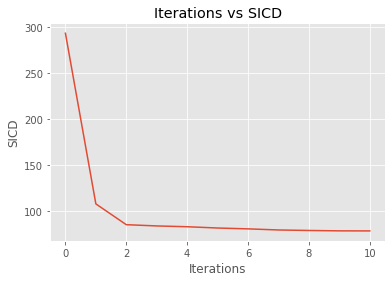

In [5]:
print(km.sicds)
# plot iterations vs SICD
plt.plot(km.sicds)
plt.xlabel('Iterations')
plt.ylabel('SICD')
plt.title('Iterations vs SICD')
plt.show()
del km

     Sepal Length  Sepal Width  Petal Length  Petal Width
3             6.9          3.1           5.1          2.3
133           6.4          2.7           5.3          1.9
8             6.4          3.1           5.5          1.8
[1163.6799999999994, 315.3811317694092]


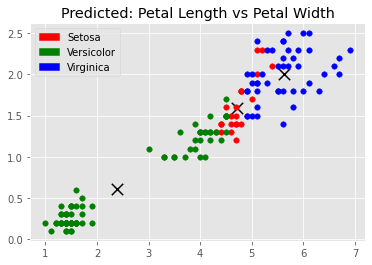

Centroids: [Petal Length, Petal Width]
[4.71923077 1.59615385] Setosa
[2.3835443  0.60759494] Versicolor
[5.61555556 2.00888889] Virginica
     Sepal Length  Sepal Width  Petal Length  Petal Width
7             6.4          3.2           5.3          2.3
59            6.9          3.1           5.4          2.1
117           5.8          2.8           5.1          2.4
[1108.1]


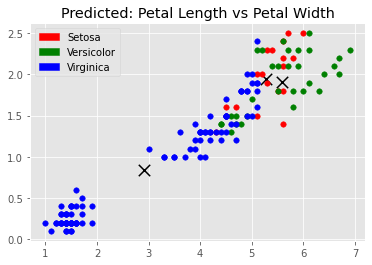

Centroids: [Petal Length, Petal Width]
[5.28421053 1.94210526] Setosa
[5.58387097 1.90967742] Versicolor
[2.902 0.838] Virginica
     Sepal Length  Sepal Width  Petal Length  Petal Width
149           5.7          2.9           4.2          1.3
112           6.3          2.9           5.6          1.8
96            7.7          2.8           6.7          2.0
[541.25, 221.60181695829036]


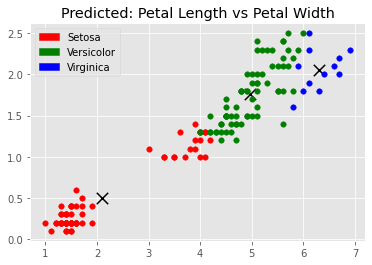

Centroids: [Petal Length, Petal Width]
[2.10144928 0.4942029 ] Setosa
[4.97246377 1.75652174] Versicolor
[6.3  2.05] Virginica
    Sepal Length  Sepal Width  Petal Length  Petal Width
24           6.7          3.3           5.7          2.5
69           5.6          2.7           4.2          1.3
38           6.3          3.3           6.0          2.5
[571.1000000000001]


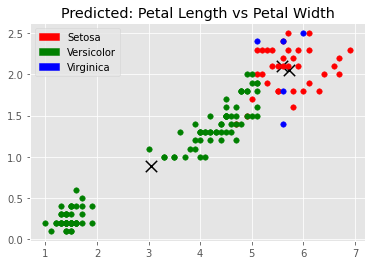

Centroids: [Petal Length, Petal Width]
[5.71714286 2.05714286] Setosa
[3.05181818 0.88545455] Versicolor
[5.58 2.1 ] Virginica
     Sepal Length  Sepal Width  Petal Length  Petal Width
52            6.5          3.2           5.1          2.0
35            6.8          3.2           5.9          2.3
111           5.0          2.3           3.3          1.0
[355.21000000000004]


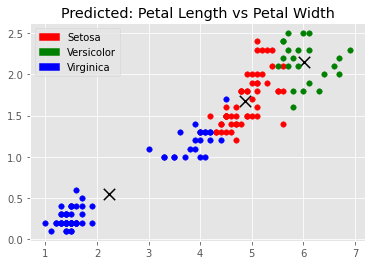

Centroids: [Petal Length, Petal Width]
[4.86851852 1.68333333] Setosa
[6.02173913 2.14782609] Versicolor
[2.22328767 0.54246575] Virginica
     Sepal Length  Sepal Width  Petal Length  Petal Width
141           7.6          3.0           6.6          2.1
146           6.0          3.0           4.8          1.8
5             6.7          3.1           4.4          1.4
[751.7800000000002]


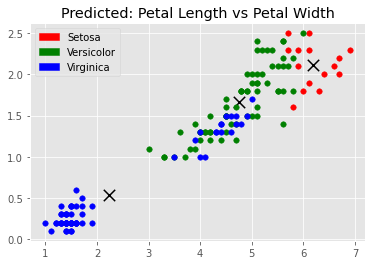

Centroids: [Petal Length, Petal Width]
[6.19333333 2.11333333] Setosa
[4.75522388 1.67014925] Versicolor
[2.23823529 0.53382353] Virginica
     Sepal Length  Sepal Width  Petal Length  Petal Width
138           5.8          2.6           4.0          1.2
129           5.6          3.0           4.1          1.3
88            6.7          3.3           5.7          2.1
[514.5899999999999]


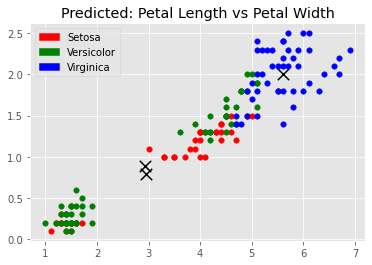

Centroids: [Petal Length, Petal Width]
[2.95319149 0.7893617 ] Setosa
[2.93508772 0.88421053] Versicolor
[5.6        2.00869565] Virginica


In [6]:
all_sicd = []
for i in range(0, 150):
    km = KMeans(3, 0.0001, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    if km.sicds[-1] > 200:
        print(centroids)
        print(km.sicds)
        import matplotlib.patches as mpatches
        colors = np.array(['red', 'green', 'blue'])
        iris_targets_legend = np.array(iris.target_names)
        red_patch = mpatches.Patch(color='red', label='Setosa')
        green_patch = mpatches.Patch(color='green', label='Versicolor')
        blue_patch = mpatches.Patch(color='blue', label='Virginica')

        for centroid in km.centroids:
            plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s=130, marker='x', color='black')

        for classification in km.classes:
            color = colors[classification]
            for features in km.classes[classification]:
                    plt.scatter(features[2], features[3], color=color, s=30)

        plt.title('Predicted: Petal Length vs Petal Width')
        plt.legend(handles=[red_patch, green_patch, blue_patch])
        plt.show()

        print('Centroids: [Petal Length, Petal Width]')
        print(km.centroids[0][2:4], 'Setosa')
        print(km.centroids[1][2:4], 'Versicolor')
        print(km.centroids[2][2:4], 'Virginica')
    del km

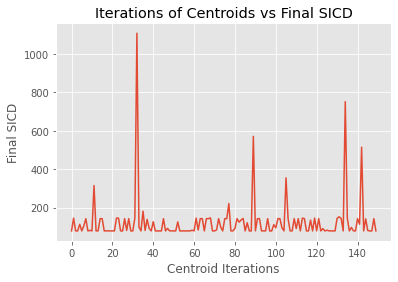

In [7]:
# All iterations
plt.plot(all_sicd)
plt.xlabel('Centroid Iterations')
plt.ylabel('Final SICD')
plt.title('Iterations of Centroids vs Final SICD')
plt.show()

In [8]:
print(max(all_sicd))

1108.1


In [9]:
all_sicd.sort()
print(all_sicd)

[78.85144142614601, 78.85144142614601, 78.85144142614601, 78.85144142614601, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582597727, 78.85566582